<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Generative Adverserial Networks (GANs). In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime on Colab or a comparable environment. If something is running longer, doublecheck your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a RNN classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for objective detection
* <a href="#p3">Part 3</a>: Describe the difference between a discriminator and generator in a GAN
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - RNNs

Use an RNN to fit a multi-class classification model on reuters news articles to distinguish topics of articles. The data is already encoded properly for use in an RNN model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well the RNN code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [0]:
from tensorflow.keras.datasets import reuters
import numpy as np

np_load_old = np.load
np.load = lambda *a, **k: np_load_old(*a, allow_pickle=True, **k)

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

np.load = np_load_old

In [2]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [3]:
from keras.utils import to_categorical

num_classes = 46
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)



Using TensorFlow backend.


In [4]:
from keras.preprocessing import sequence

maxlen = 200

X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (8982, 200)
X_test shape: (2246, 200)


In [0]:
# Keep getting gpu sync failed error
import tensorflow as tf

# gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.7)
# sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [6]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, SimpleRNN, LSTM

max_features = 10000

model = Sequential()
model.add(Embedding(max_features, 128))
# SimpleRNN model kept getting 'GPU sync error', switched to LSTM
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train,
                   epochs=10,
                   batch_size=128)

W0823 15:39:42.792820 139818177910656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0823 15:39:42.811927 139818177910656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0823 15:39:42.814132 139818177910656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0823 15:39:42.916435 139818177910656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0823 15:39:42.929325 

Epoch 1/10
8982/8982 [==============================] - 23s 3ms/step - loss: 2.4107 - acc: 0.3903
Epoch 2/10
8982/8982 [==============================] - 21s 2ms/step - loss: 1.9627 - acc: 0.4857
Epoch 3/10
8982/8982 [==============================] - 21s 2ms/step - loss: 1.7756 - acc: 0.5342
Epoch 4/10
8982/8982 [==============================] - 21s 2ms/step - loss: 1.6618 - acc: 0.5603
Epoch 5/10
8982/8982 [==============================] - 21s 2ms/step - loss: 1.5511 - acc: 0.5925
Epoch 6/10
8982/8982 [==============================] - 21s 2ms/step - loss: 1.4560 - acc: 0.6148
Epoch 7/10
8982/8982 [==============================] - 21s 2ms/step - loss: 1.3794 - acc: 0.6344
Epoch 8/10
8982/8982 [==============================] - 21s 2ms/step - loss: 1.2844 - acc: 0.6597
Epoch 9/10
8982/8982 [==============================] - 21s 2ms/step - loss: 1.2063 - acc: 0.6825
Epoch 10/10
8982/8982 [==============================] - 21s 2ms/step - loss: 1.1326 - acc: 0.6980


In [11]:
score, accuracy = model.evaluate(X_test, y_test, batch_size=128)

2246/2246 [==============================] - 1s 590us/step


In [13]:
print('score:', score)
print('accuracy:', accuracy)

score: 1.4201746767159562
accuracy: 0.6362422092196566


<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and ResNet50 (pre-trained) to detect which of the following images contain frogs:

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>


In [7]:
!pip install google_images_download

     |████████████████████████████████| 911kB 5.1MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14547 sha256=d6b6f39a4bbb6194aead434223b267a5885b5f6fafe058ba833e091bb079906f
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [3]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "animal pond", "limit": 15, "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = animal pond
Evaluating...
Starting Download...
Image URL: https://www.enchantedlearning.com/pgifs/Pondanimals.GIF
Completed Image ====> 1.Pondanimals.GIF
Image URL: https://i.ytimg.com/vi/NCbu0TND9vE/hqdefault.jpg
Completed Image ====> 2.hqdefault.jpg
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116_inline.png
Completed Image ====> 3.PKLS4116_inline.png
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116.png
Completed Image ====> 4.PKLS4116.png
Image URL: https://get.pxhere.com/photo/water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg
Completed Image ====> 5.water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg
Image URL: https://cdn.pixabay.com/photo/2017/04/19/20/37/frog-2243543_960_720.jpg
Completed Image ====> 6.frog-2243543_960_720.jpg
Image URL: https://i.pinimg.com/origina

In [0]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

from IPython.display import Image

def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

In [5]:
absolute_image_paths

({'animal pond': ['/content/downloads/animal pond/1.Pondanimals.GIF',
   '/content/downloads/animal pond/2.hqdefault.jpg',
   '/content/downloads/animal pond/3.PKLS4116_inline.png',
   '/content/downloads/animal pond/4.PKLS4116.png',
   '/content/downloads/animal pond/5.water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg',
   '/content/downloads/animal pond/6.frog-2243543_960_720.jpg',
   '/content/downloads/animal pond/7.12aee2aa186a7b69a66563f138bba822.jpg',
   '/content/downloads/animal pond/8.Alligator_animal_on_pond.jpg',
   '/content/downloads/animal pond/9.birds-in-a-pond-5986310798966784.jpg',
   '/content/downloads/animal pond/10.Gold-fish.jpg',
   '/content/downloads/animal pond/11.goose-2650209_960_720.jpg',
   '/content/downloads/animal pond/12.maxresdefault.jpg',
   '/content/downloads/animal pond/13.urban-wildlife-morningside-red-ear-slider-lg.jpg',
   '/content/downloads/animal pond/14.06af3a_f89e7596d52

In [0]:
import numpy as np

def img_list_predict(img_list):
  model = ResNet50(weights='imagenet')
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  features = model.predict(x)
  results = decode_predictions(features, top=3)[0]
  return results

def look_image(name):
  for prediction in results[name]:
    print(str(prediction[1]) + ':' + str(round(prediction[2] * 100, 2)) + '%')
  return Image(filename=name, width=600)

In [10]:
images = absolute_image_paths[0]['animal pond']
img_list_predict(images)

40960/35363 [==================================] - 0s 0us/step


[('n03485794', 'handkerchief', 0.88227266),
 ('n02834397', 'bib', 0.022680871),
 ('n03291819', 'envelope', 0.020095097)]

In [0]:
# Stripping out any GIFs, model doesn't work on them
import os

path = './downloads/animal pond/'
results = {}

for file in os.listdir(path):
  name = path + file
  img = process_img_path(name)
  results[name] = img_list_predict(img)
  
files = []
for key in results.keys():
  if key[-3:] != 'GIF':
    files.append(key)

In [12]:
# checking to make sure GIFs removed

files

['./downloads/animal pond/4.PKLS4116.png',
 './downloads/animal pond/5.water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg',
 './downloads/animal pond/15.14036930_f496.jpg',
 './downloads/animal pond/14.06af3a_f89e7596d5254e6e8896f054e8c4ea7b~mv2_d_1650_1275_s_2.jpg',
 './downloads/animal pond/6.frog-2243543_960_720.jpg',
 './downloads/animal pond/10.Gold-fish.jpg',
 './downloads/animal pond/3.PKLS4116_inline.png',
 './downloads/animal pond/13.urban-wildlife-morningside-red-ear-slider-lg.jpg',
 './downloads/animal pond/7.12aee2aa186a7b69a66563f138bba822.jpg',
 './downloads/animal pond/8.Alligator_animal_on_pond.jpg',
 './downloads/animal pond/11.goose-2650209_960_720.jpg',
 './downloads/animal pond/12.maxresdefault.jpg',
 './downloads/animal pond/2.hqdefault.jpg',
 './downloads/animal pond/9.birds-in-a-pond-5986310798966784.jpg']

In [0]:
frogs = []

for frog in files:
  frog_positive = results[frog]
  for i in range(3):
    if 'frog' in frog_positive[i][1]:
      frogs.append(frog)
      break

In [14]:
frogs

['./downloads/animal pond/6.frog-2243543_960_720.jpg']

In [0]:
def img_show(img_list):
  model = ResNet50(weights='imagenet')
  for img_url in img_list:
    display(Image(filename=img_url, width=600))
    img = process_img_path(img_url)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    results = decode_predictions(features, top=3)[0]
    print(results)
  return

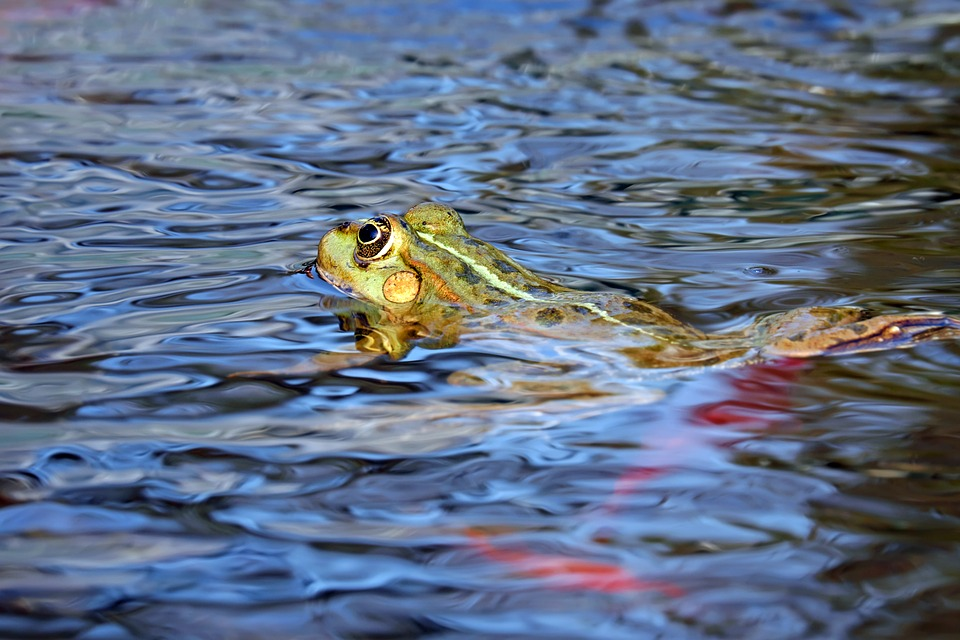

[('n01641577', 'bullfrog', 0.9223301), ('n01644900', 'tailed_frog', 0.07364703), ('n01644373', 'tree_frog', 0.0011781204)]


In [22]:
img_show(frogs)

At time of writing at least a few do, but since the Internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model.

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goal* - also check for fish.

In [0]:
fishes = []

for fish in files:
  fish_positive = results[fish]
  for i in range(3):
    if 'fish' in fish_positive[i][1]:
      fishes.append(fish)
      break

In [27]:
fishes

['./downloads/animal pond/10.Gold-fish.jpg',
 './downloads/animal pond/2.hqdefault.jpg']

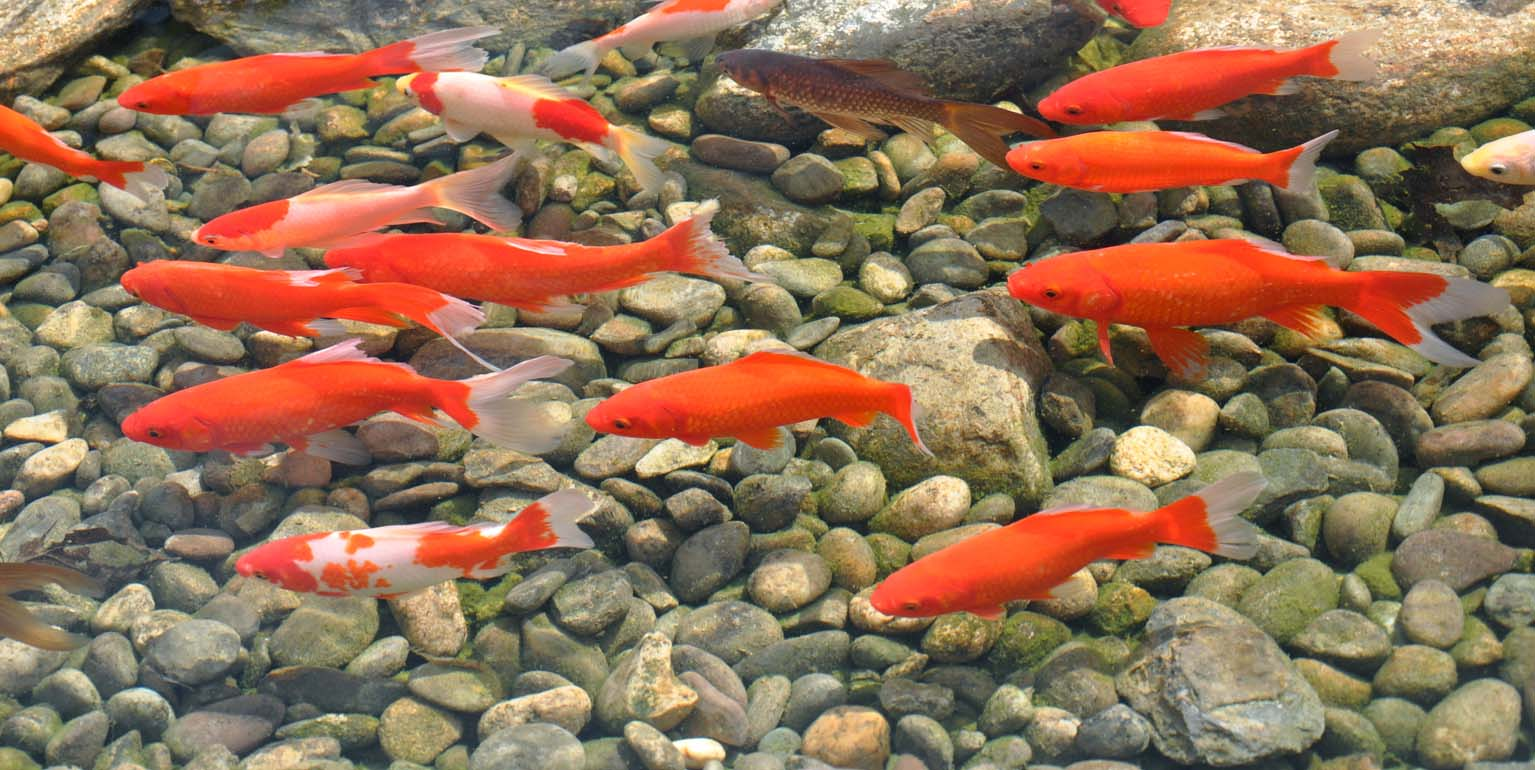

[('n01443537', 'goldfish', 0.9475324), ('n04596742', 'wok', 0.020672062), ('n09256479', 'coral_reef', 0.008456454)]


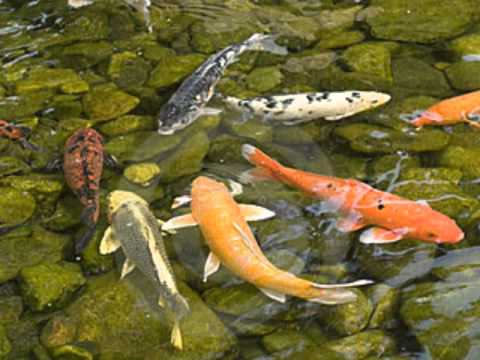

[('n01443537', 'goldfish', 0.8495859), ('n01631663', 'eft', 0.067602046), ('n02536864', 'coho', 0.035163548)]


In [28]:
img_show(fishes)

<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

__*Your Answer:*__ 

Variational autoencoders, used for image editing via concept vectors. Only discovered in 2013-14, they're a new type of autoencoder that mixes ideas from deep learning with Bayesian statistics.

They vary from traditional autoencoders by incorporating extra statistical handling that forces the model to learn continuous, highly structured latent spaces. Instead of compressing the input image into a fixed code in the latent space, a variational autoencoder turns the image into the parameters of a statistical distribution: a mean and a variance.

<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?

Probably having a wide understanding of the field in general. I need to start drilling down more into particular areas of interest.

- What area of Data Science would you most like to learn more about, and why?

Different 'dirtier', real world problems using neural networks / Deep Learning models. Relatedly, I could stand to improve in cleaning data and feature engineering.

- Where do you think Data Science will be in 5 years?

Hopefully widespread use in almost every area of the economy. With the high speed of change, there will most likely be models and techniques in widespread use that are unavailable to most today.

- What are the threats posed by AI to our society?

Loss of unskilled labor jobs, increased inequality, entrenched bias, widespread and deadly use in warfare.

- How do you think we can counteract those threats? 

Government regulations, adoption of Universal Basic Income, mindful application of AI.

- Do you think achieving General Artifical Intelligence is ever possible?

Yes. Probably not anytime soon, but even just the mobile devices in our pockets were unimaginable to people a short time ago. 

A few sentences per answer is fine - only elaborate if time allows.

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [9]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")